# Chaper 2: Creating Animations

New Skills in This Chapter:

• Creating line plots, bar charts, and pie charts in Python

• Putting multiple graphs in a figure as subplots

• Creating animations by combining multiple graphs into gif files

• Combining two animations into one so frames are shown side by side

***
*If a picture is worth a thousand words, what is a video worth?*
***
The Huffington Post

--Scott MacFarland

***

# 2.1 Create Plots with Matplotlib

First, activate the virtual environment MLA by running the following line of code in the Anaconda prompt (in Windows) or a terminal (in Mac or Linux):

`
conda activate MLA
`

Here I assume you have followed the instructions in Chapter 1 and created the virtual environment MLA. If not, refer back to Chapter for details on how to do so. Install the three libraries by running the following lines of commands in the same Anaconda prompt or terminal with the virtual environment activated::<br>
`pip install matplotlib==3.5.2` <br>
`pip install pandas==1.4.2`<br>
`pip install imageio==2.16.2`<br>

To launch Jupyter Notebook you installed in the virtual environment MLA in Chapter 1, execute the following command in the same Anaconda prompt or terminal with the virtual environment activated:

`
jupyter notebook
`

Before you start, open a blank Jupyter notebook and save it as ch02.ipynb in the directory /Desktop/mla/ on your computer. Next, we'll create a subdirectory /files/ch02/ to store files for this chapter. 

Start a new cell in ch02.ipynb and enter the following lines of code in it:

In [1]:
import os

os.makedirs("files/ch02", exist_ok=True)

## 2.1.1 A Single Line Plot 

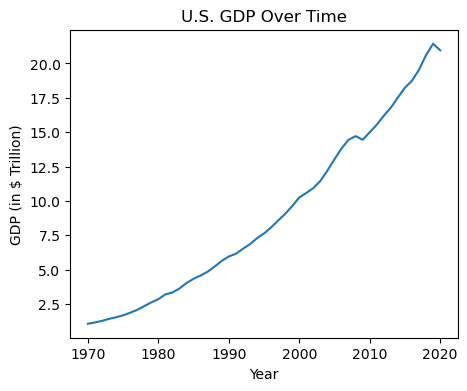

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("files/ch02/GDPs.csv") 
fig=plt.figure(dpi=100, figsize=(5,4)) 
plt.plot(df["year"], df["USA"])
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. GDP Over Time')
plt.show()

## 2.1.2 Multiple Lines in the Same Plot

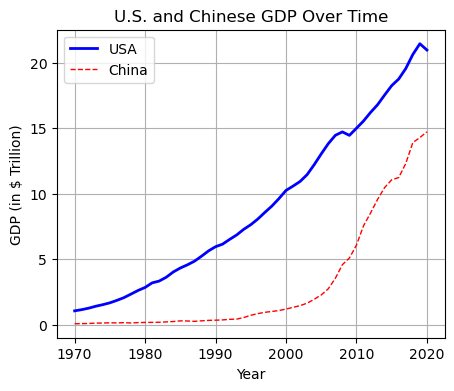

In [3]:
fig=plt.figure(dpi=100, figsize=(5,4))
plt.plot(df["year"],df["USA"],color='blue',
linestyle='solid',linewidth=2)
plt.plot(df["year"],df["China"],color='red',
linestyle='dashed',linewidth=1)
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. and Chinese GDP Over Time')
plt.legend(labels=["USA","China"])
plt.grid()
plt.show()

# 2.2 Create Subplots

## 2.2.1 Create Individual Plots 

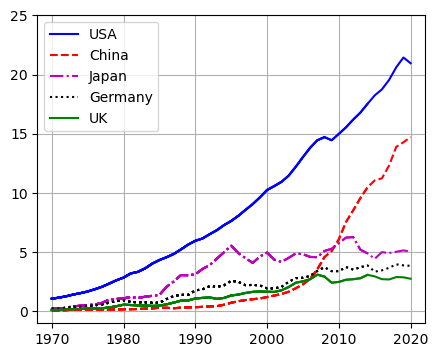

In [4]:
fig=plt.figure(dpi=100, figsize=(5,4)) 
plt.grid()
# fix the range of the x value and y values
plt.xlim(1968,2022) 
plt.ylim(-1,25)
# iterate through the nine ending years
for i in range(1972,2021,6):
    # use years from 1970 to year i
    dfi=df[df["year"]<=i]  
    plt.plot(dfi["year"],dfi["USA"],color='b',
             linestyle='-') 
    plt.plot(dfi["year"],dfi["China"],color='r',
             linestyle='--')
    plt.plot(dfi["year"],dfi["Japan"],color='m',
             linestyle='-.')
    plt.plot(dfi["year"],dfi["Germany"],color='k',
             linestyle=':')
    plt.plot(dfi["year"],dfi["UK"],color='g',
             linestyle=None)
    plt.legend(
        labels=["USA","China","Japan","Germany","UK"],
               loc="upper left")
    # save individual pictures on your computer
    plt.savefig(f"files/ch02/p{i}.png")

## 2.2.2 Create Subplots

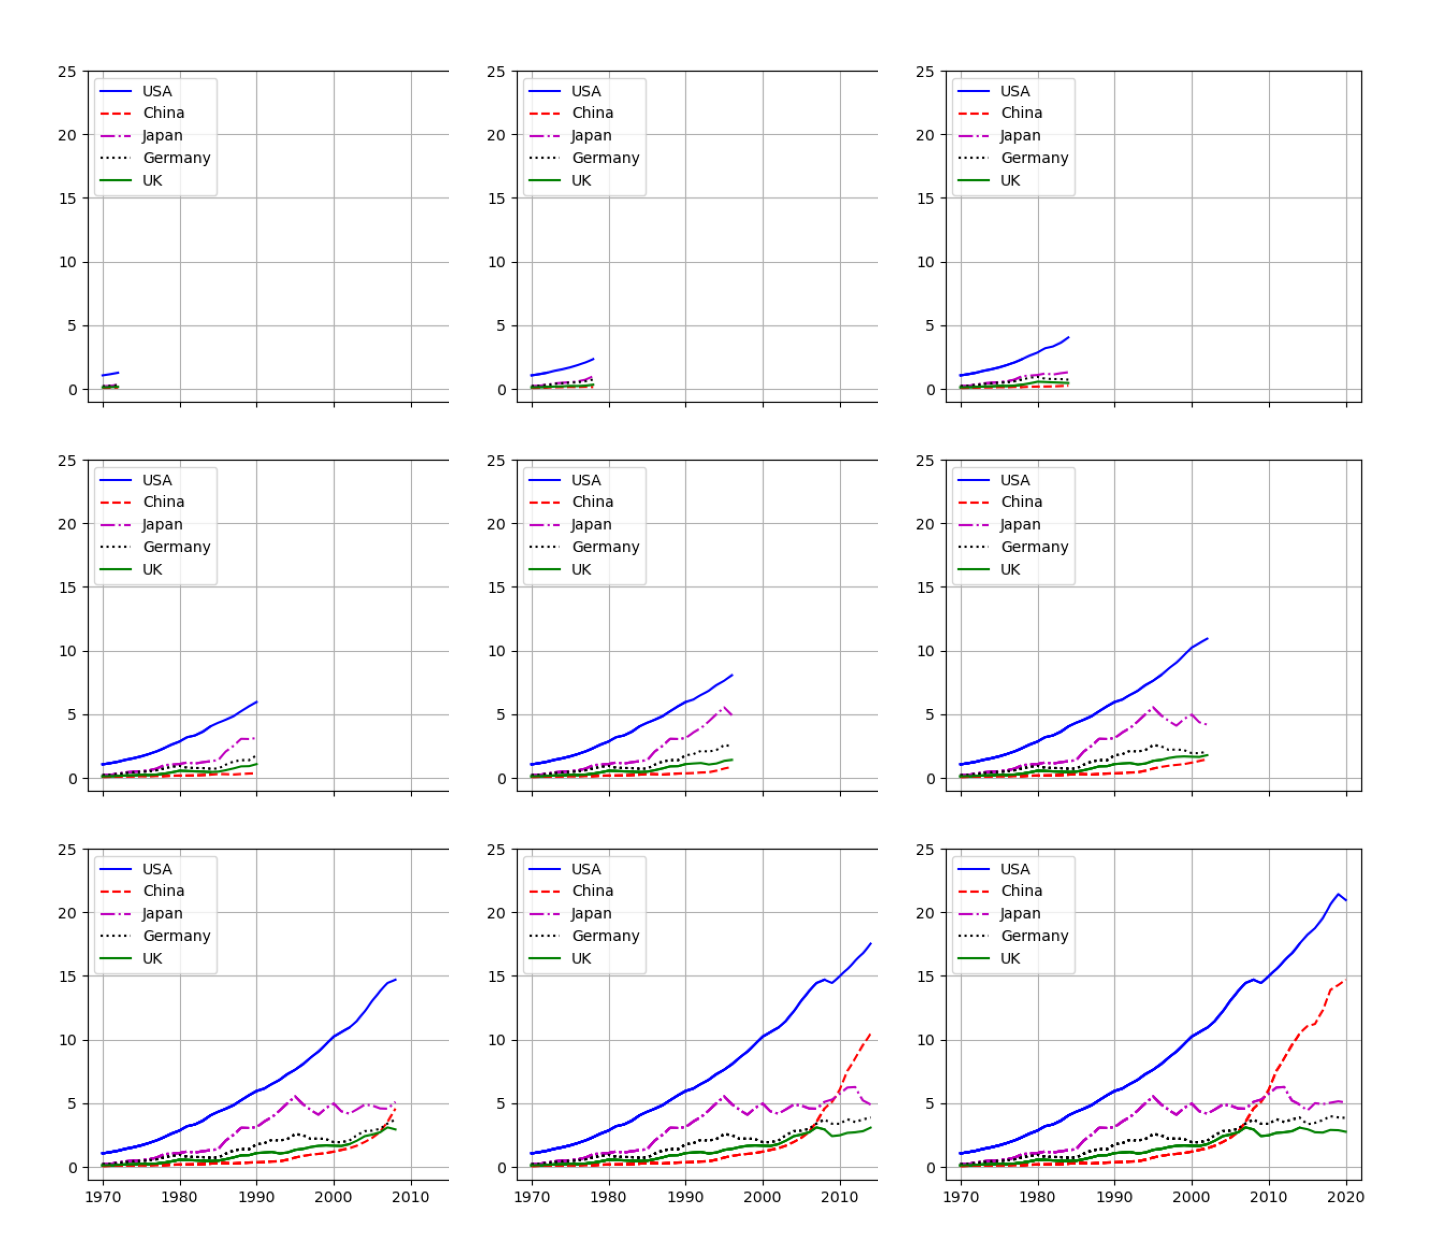

In [5]:
import imageio, PIL

plt.figure(dpi=200,figsize=(9,9))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i+j+1)
        img=f"files/ch02/p{1972+6*(3*i+j)}.png"
        nparray=PIL.Image.open(img)
        plt.imshow(nparray)
        plt.axis("off")
plt.subplots_adjust(hspace=-0.36,wspace=-0.2)
plt.show()

# 2.3 Create Animated Plots
Next, we’ll create an animation of the GDP values of the five countries over time. We’ll first create a plot of the five countries’ GDPs each year. That gives us a total of 51 graphs. We’ll then combine the graphs in a single ***gif*** file so that the graphs will appear sequentially. As a result, you’ll see the animation effect. 


## 2.3.1. Generate Annual Line Plots 

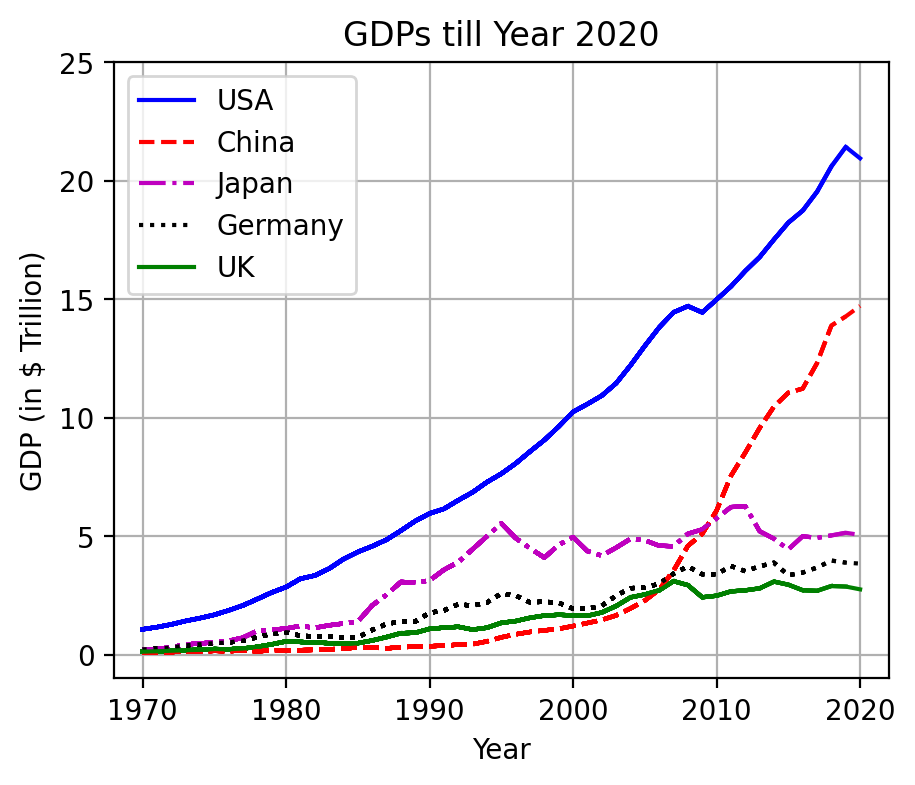

In [6]:
fig=plt.figure(dpi=200,figsize=(5,4))
plt.grid()
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')

plt.xlim(1968,2022)
plt.ylim(-1,25)
for i in range(1971,2021,1):
    dfi=df[df["year"]<=i]
    plt.plot(dfi["year"],dfi["USA"],color='b',linestyle='-')
    plt.plot(dfi["year"],dfi["China"],color='r',linestyle='--')
    plt.plot(dfi["year"],dfi["Japan"],color='m',linestyle='-.')
    plt.plot(dfi["year"],dfi["Germany"],color='k',linestyle=':')
    plt.plot(dfi["year"],dfi["UK"],color='g',linestyle=None)
    plt.legend(labels=["USA","China","Japan","Germany","UK"],
        loc="upper left")
    plt.title(f'GDPs till Year {i}')
    plt.savefig(f"files/ch02/year{i}.png")

## 2.3.2 Animate the Plots

In [7]:
import numpy as np
frames=[]
for i in range(1971,2021,1):
    frame=PIL.Image.open(f"files/ch02/year{i}.png")
    frame=np.asarray(frame)
    frames.append(frame)
imageio.mimsave('files/ch02/GDPs.gif', frames, duration=200)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/GDPs.gif" />

# 2.4. Create Animated Bar Charts

## 2.4.1. Create A Horizontal Bar Chart
We'll look at the GDPs of the five countries in year 2009, sort the values, and then create a horizontal bar chart.

<BarContainer object of 5 artists>

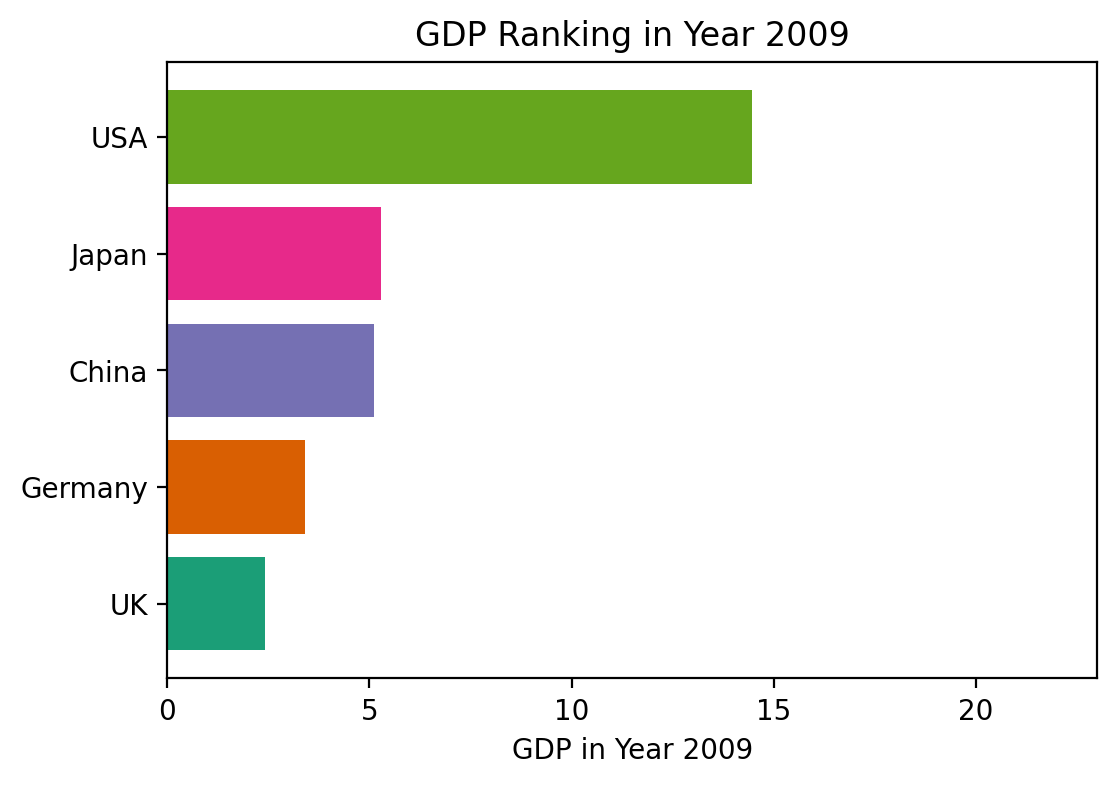

In [8]:
df = df.set_index("year")
yr2009 = df.loc[2009].sort_values()
fig = plt.figure(dpi=200, figsize=(6,4))
colors = plt.cm.Dark2(range(5))
y = yr2009.index
width = yr2009.values
plt.xlim(0,23)
plt.title("GDP Ranking in Year 2009")
plt.xlabel("GDP in Year 2009")
plt.barh(y=y, width=width, color=colors)

## 2.4.2. Generate Annual Bar Charts 

In [9]:
df.head()

,China,Germany,UK,Japan,USA
year,,,,,
1970,0.092603,0.215838,0.130672,0.212609,1.07330
1971,0.099801,0.249985,0.148114,0.240152,1.16485
1972,0.113688,0.299802,0.169965,0.318031,1.27911
1973,0.138544,0.398374,0.192538,0.432083,1.42538
1974,0.144182,0.445303,0.206131,0.479626,1.54524


In [10]:
# by year, sorted.
for i in range(1970,2021,1):
    yri = df.loc[i].sort_values()
    fig = plt.figure(dpi=200, figsize=(6,4))
    colors = plt.cm.Dark2(range(5))
    y = yri.index
    width = yri.values
    plt.xlim(0,23)
    plt.title(f"GDP Ranking in Year {i}")
    plt.xlabel(f"GDP in Year {i}")
    plt.barh(y=y, width=width, color=colors)
    fig.savefig(f"files/ch02/bar{i}.png")
 
    plt.close(fig)

In [11]:
yri

UK          2.75980
Germany     3.84641
Japan       5.05776
China      14.72270
USA        20.95300
Name: 2020, dtype: float64

## 2.4.3. Animate the Bar Charts 

In [12]:
frames=[]
for i in range(1970,2021,1):
    frame=PIL.Image.open(f"files/ch02/bar{i}.png")
    frames.append(frame)
imageio.mimsave('files/ch02/bar.gif', frames, duration=200)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/bar_sorted.gif" />

# 2.5. Put Bar Charts and Plots Side by Side

## 2.5.1. Combine A Bar Chart and A Plot

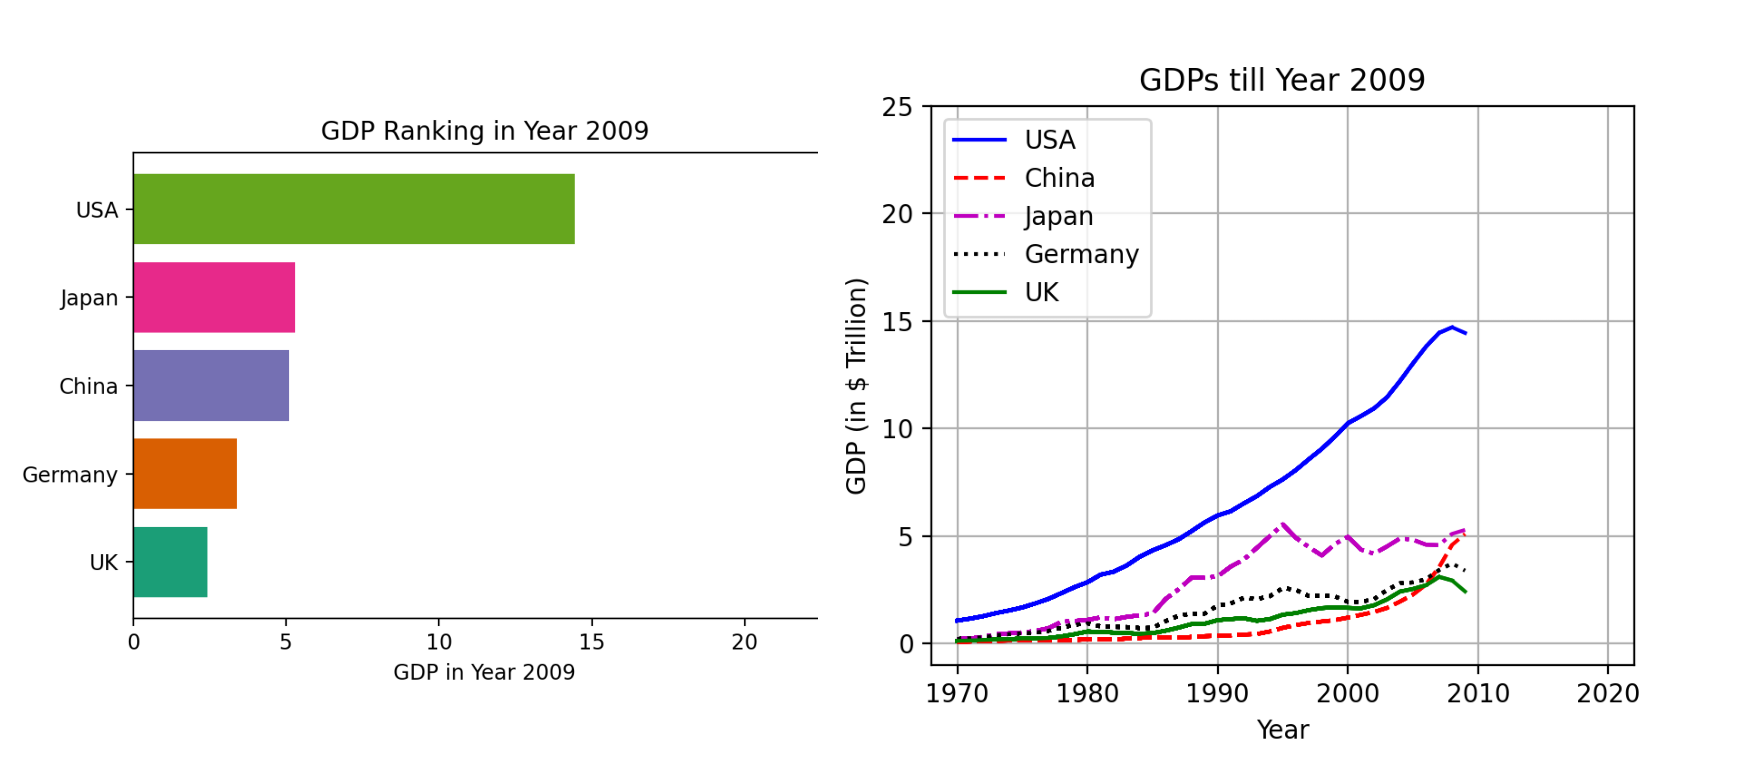

In [13]:
fig = plt.figure(figsize=(11,6),dpi=200)
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
# Customize subplots:
frame1=PIL.Image.open("files/ch02/bar2009.png")
frame1=np.asarray(frame1)
frame2=PIL.Image.open("files/ch02/year2009.png")
frame2=np.asarray(frame2)
ax0.imshow(frame1)
ax0.axis('off')
ax1.imshow(frame2)
ax1.axis('off')
plt.subplots_adjust(wspace=-0.12)
plt.savefig("files/ch02/combine.png")

## 2.5.2. Create An Animation of the Combined Pictures

In [14]:
frames=[]
for i in range(1971,2021,1):
    frame1=PIL.Image.open(f"files/ch02/bar{i}.png")
    frame1=np.asarray(frame1)
    frame2=PIL.Image.open(f"files/ch02/year{i}.png")
    frame2=np.asarray(frame2)
    frame=np.concatenate([frame1,frame2],axis=1)
    frames.append(np.array(frame))
imageio.mimsave('files/ch02/barsplots.gif', frames, duration=200)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/barsplots.gif" />

# 2.6. Animated Pie Charts

## 2.6.1. Create A Pie Chart
We'll look at the GDPs of the five countries in year 2009, sort the values, and then create a pie chart.

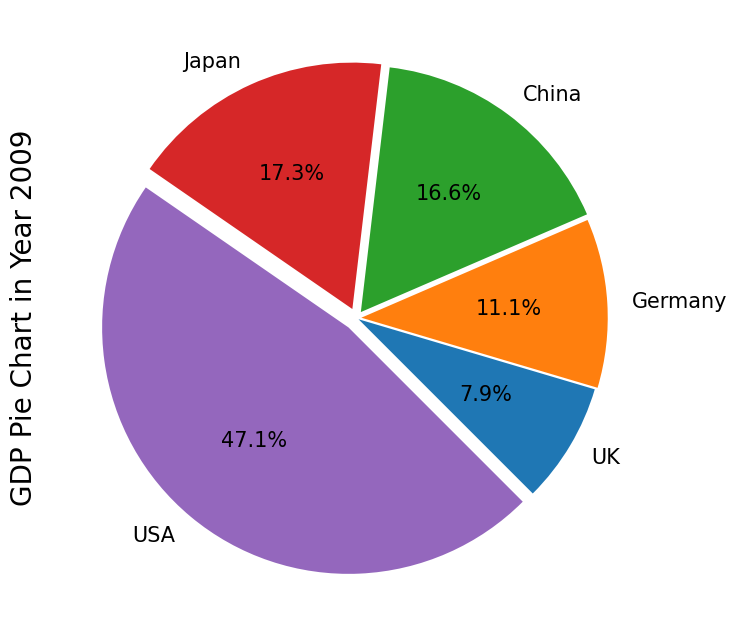

In [15]:
fig = plt.figure(figsize=(12,8),dpi=100)
colors = plt.cm.Dark2(range(5))
labels = yr2009.index
GDPs = yr2009.values
plt.ylabel("GDP Pie Chart in Year 2009",fontsize=20)
explode = [0.01, 0.02, 0.03, 0.04, 0.05]
plt.pie(GDPs,
    labels=labels,
    autopct='%1.1f%%',
    startangle = -45,
    textprops={'fontsize': 15},
    explode=explode)
plt.savefig(f"files/ch02/pie.png")

## 2.6.2. Generate Annual Pie Charts 
You'll iterate through years 1970 to 2020. In each iteration, you’ll generate a pie chart of the GDPs of the five countries. You’ll also save the chart on your computer in each iteration. This creates a total of 51 pie charts.

In [16]:
for i in range(1970,2021,1):
    yri = df.loc[i].sort_values()
    fig = plt.figure(figsize=(12, 8),dpi=100)
    colors = plt.cm.Dark2(range(5))
    labels = yri.index
    GDPs = yri.values
    plt.ylabel(f"GDP Pie Chart in Year {i}", fontsize=20)
    explode = [ 0.01, 0.02, 0.03, 0.04,0.05]
    plt.pie(GDPs,
        labels=labels,
        autopct='%1.1f%%',
        startangle = -45,
        textprops={'fontsize': 15},
        explode=explode)
    fig.savefig(f"files/ch02/pie{i}.png")
    plt.close(fig)

## 2.6.3. Animate the Combined Pie Charts and Plots
The process of converting bar charts into animation is similar to what we have done before for the line plots. We’ll use the ***PIL*** library to convert the charts into numpy arrays. We’ll then use the ***imageio*** library to combine the sequence of arrays into one animation in the ***gif*** format. 

In [17]:
frames=[]
for i in range(1971,2021,1):
    frame1=PIL.Image.open(f"files/ch02/pie{i}.png")
    frame1=np.asarray(frame1)
    frame2=PIL.Image.open(f"files/ch02/year{i}.png")
    frame2=np.asarray(frame2)
    frame=np.concatenate([frame1,frame2],axis=1)
    frames.append(np.array(frame))
imageio.mimsave('files/ch02/pieplot.gif', frames, duration=200)

<img src="https://gattonweb.uky.edu/faculty/lium/ml/pieplot.gif" />

## 2.7. Appendix: Obtain the GDP Values from Word Bank

Below, you'll learn how to obtain the GDP values of the five countries and save it in a CSV file. The raw dataset is downloaded from the World Bank website https://data.worldbank.org/indicator/NY.GDP.MKTP.CD. The dataset is then cleaned up and I kept data for the five countries (USA, China, Japan, Germany, and UK) from 1970 to 2020. The cleaned-up data is placed on my website https://gattonweb.uky.edu/faculty/lium/ml/GDPs.csv. Below is the Python code used to extract the data.

In [18]:
'''
First, go to this site https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
Under Download in the middle right, click on the CSV option to download the CSV files
put the three CSV files in your local folder
'''

import pandas as pd
import numpy as np
import pickle

# 
df=pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_4019306.csv", skiprows=4)

df=df[(df["Country Name"]=="China") | 
      (df["Country Name"]=="United States") |
      (df["Country Name"]=="Japan") |
      (df["Country Name"]=="Germany") |
      (df["Country Name"]=="United Kingdom")]

df.loc[df['Country Name']=="United States", 'Country Name'] = "USA"
df.loc[df['Country Name']=="United Kingdom", 'Country Name'] = "UK"

print(df.columns)
df=df.drop(['Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', 
       '1967', '1968', '1969'], axis=1)

df=df.set_index('Country Name')
df=df.transpose()
df=df/1000000000000
df["year"]=df.index
df.to_csv("GDPs.csv")

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       'Unnamed: 66'],
      dtype='object')


This creates the file GDPs.csv that we have used earlier. 

## 2.9 Exercises

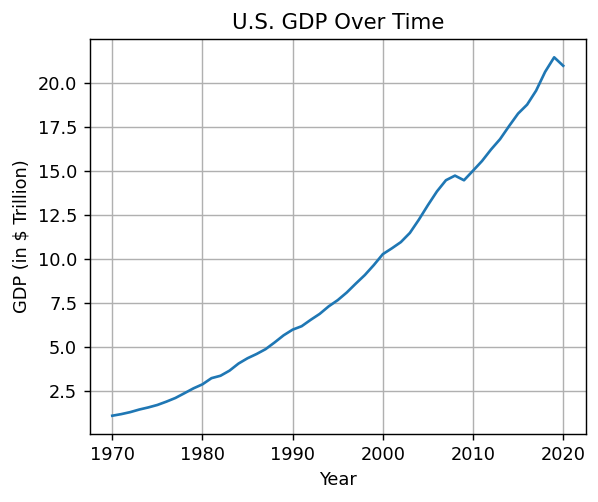

In [19]:
# Answer to question 2.3 
df=pd.read_csv("files/ch02/GDPs.csv") 
fig=plt.figure(dpi=128, figsize=(5,4)) 
plt.plot(df["year"], df["USA"])
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. GDP Over Time')
plt.grid()
plt.show()

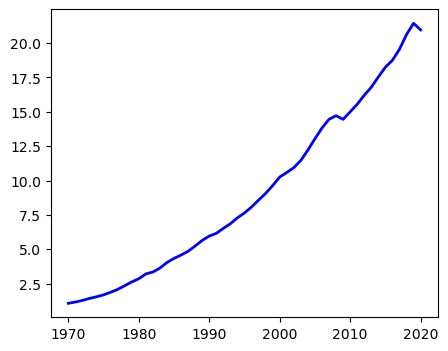

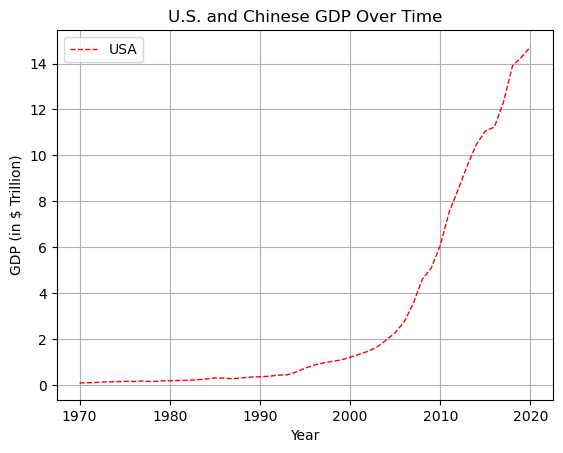

In [20]:
# Answer to question 2.4
fig=plt.figure(dpi=100, figsize=(5,4))
plt.plot(df["year"],df["USA"],color='blue',
linestyle='solid',linewidth=2)
plt.show()
plt.plot(df["year"],df["China"],color='red',
linestyle='dashed',linewidth=1)
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. and Chinese GDP Over Time')
plt.legend(labels=["USA","China"])
plt.grid()
plt.show()

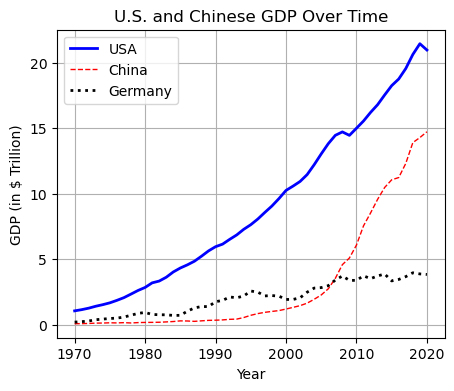

In [21]:
# Answer to question 2.5
fig=plt.figure(dpi=100, figsize=(5,4))
plt.plot(df["year"],df["USA"],color='blue',
    linestyle='solid',linewidth=2)
plt.plot(df["year"],df["China"],color='red',
    linestyle='dashed',linewidth=1)
plt.plot(df["year"],df["Germany"],color='k',
    linestyle='dotted',linewidth=2)
plt.xlabel('Year')
plt.ylabel('GDP (in $ Trillion)')
plt.title('U.S. and Chinese GDP Over Time')
plt.legend(labels=["USA","China","Germany"])
plt.grid()
plt.show()

In [22]:
# Answer to question 2.6
fig=plt.figure(dpi=100, figsize=(5,4)) 
plt.grid()
# fix the range of the x value and y values
plt.xlim(1969,2021) 
plt.ylim(-0.5,24.5)
# iterate through the nine ending years
for i in range(1972,2021,6):
    # use years from 1970 to year i
    dfi=df[df["year"]<=i]  
    plt.plot(dfi["year"],dfi["USA"],color='b',
             linestyle='-') 
    plt.plot(dfi["year"],dfi["China"],color='r',
             linestyle='--')
    plt.plot(dfi["year"],dfi["Japan"],color='m',
             linestyle='-.')
    plt.plot(dfi["year"],dfi["Germany"],color='k',
             linestyle=':')
    plt.plot(dfi["year"],dfi["UK"],color='g',
             linestyle=None)
    plt.legend(
        labels=["USA","China","Japan","Germany","UK"],
               loc="upper left")
    # save individual pictures on your computer
    #plt.savefig(f"files/ch02/p{i}.png")

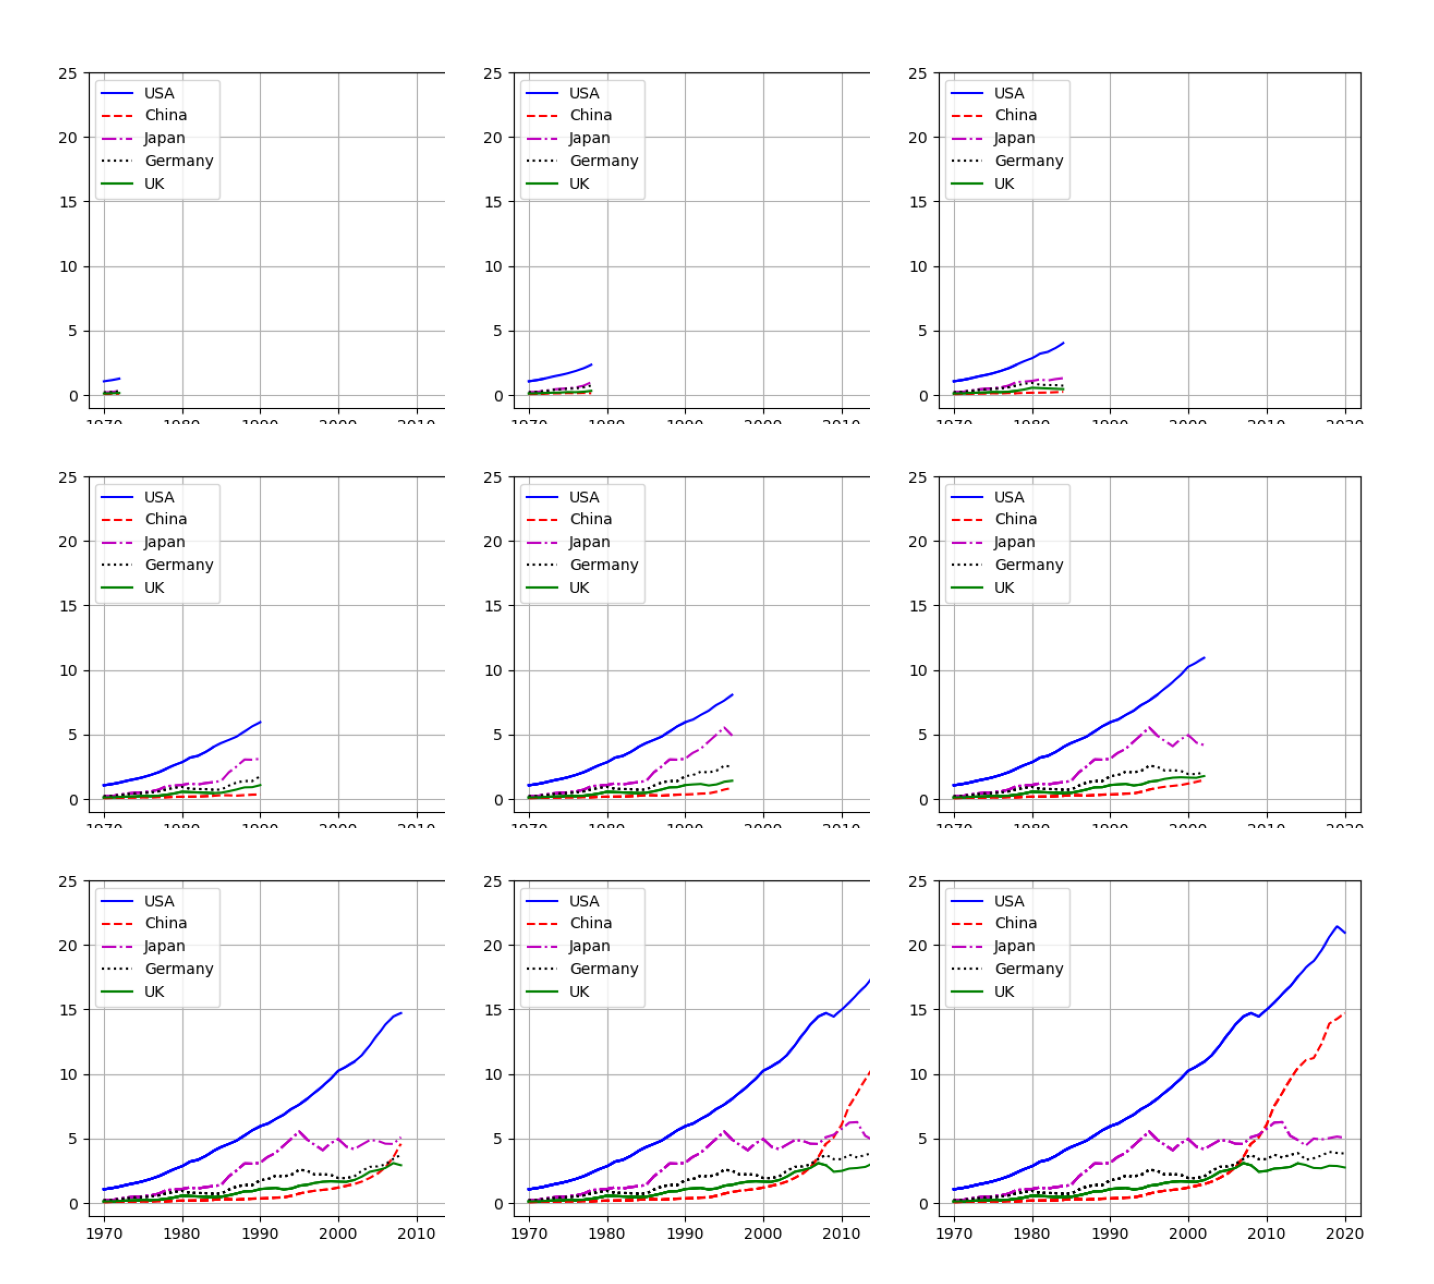

In [23]:
# Answer to question 2.7
import imageio, PIL

plt.figure(dpi=200,figsize=(9,9))
for i in range(3):
    for j in range(3):
        plt.subplot(3, 3, 3*i+j+1)
        img=f"files/ch02/p{1972+6*(3*i+j)}.png"
        nparray=PIL.Image.open(img)
        plt.imshow(nparray)
        plt.axis("off")
plt.subplots_adjust(hspace=-0.3,wspace=-0.22)
plt.show()

In [24]:
# Answer to question 2.8
import numpy as np
frames=[]
for i in range(1971,2021,1):
    frame=PIL.Image.open(f"files/ch02/year{i}.png")
    frame=np.asarray(frame)
    frames.append(frame)
imageio.mimsave('files/ch02/GDPs_fast.gif', frames, duration=150)

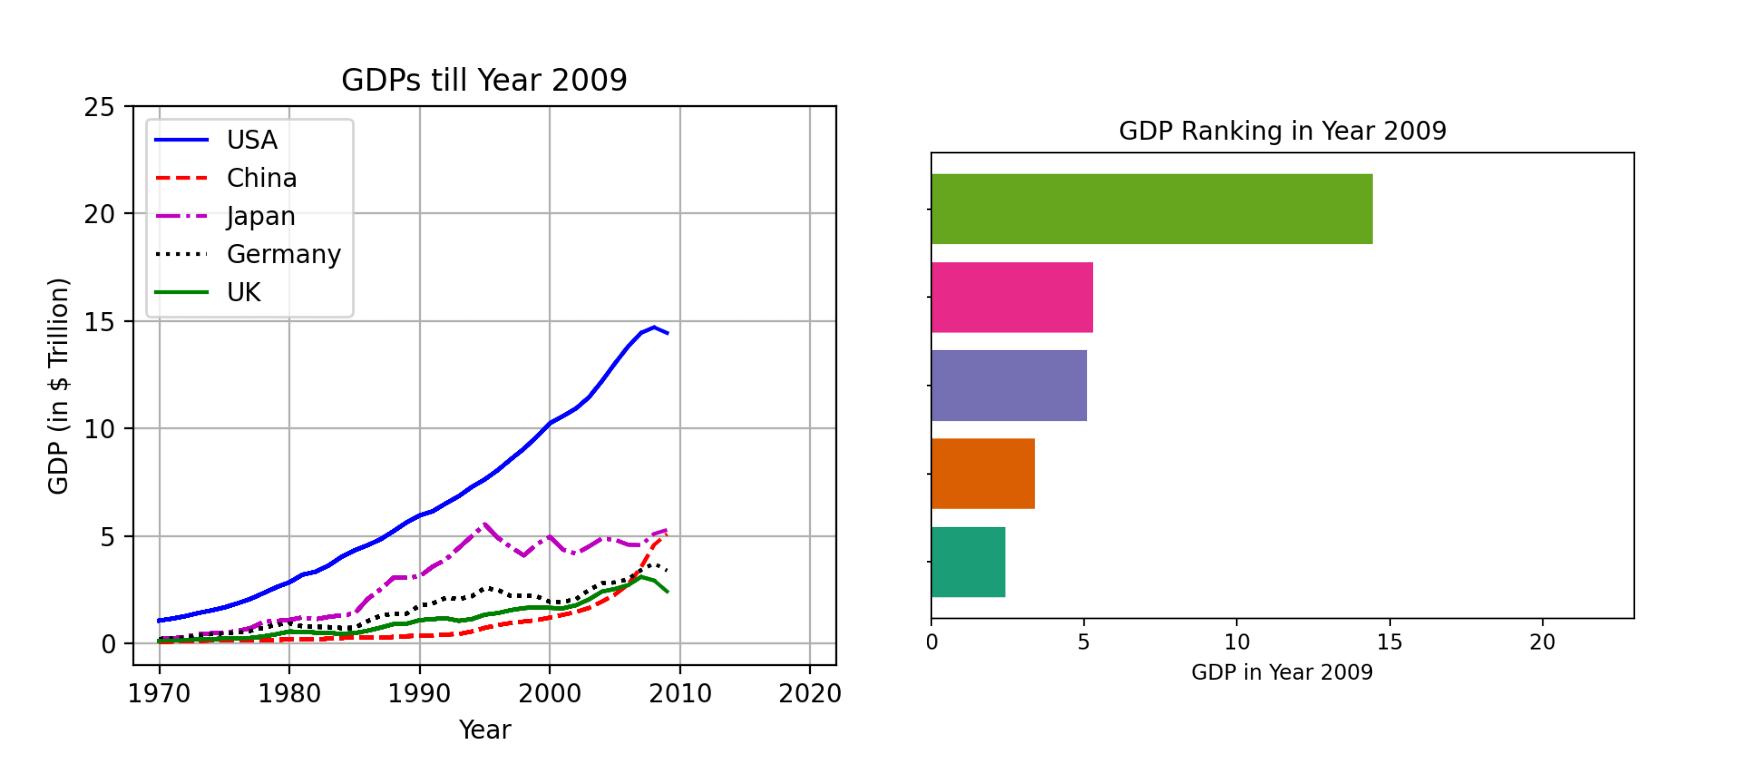

In [25]:
# Answer to question 2.9
fig = plt.figure(figsize=(11,6),dpi=200)
ax0 = fig.add_subplot(122)
ax1 = fig.add_subplot(121)
# Customize subplots:
frame1=PIL.Image.open("files/ch02/bar2009.png")
frame1=np.asarray(frame1)
frame2=PIL.Image.open("files/ch02/year2009.png")
frame2=np.asarray(frame2)
ax0.imshow(frame1)
ax0.axis('off')
ax1.imshow(frame2)
ax1.axis('off')
plt.subplots_adjust(wspace=-0.12)
#plt.savefig("files/ch02/combine.png")

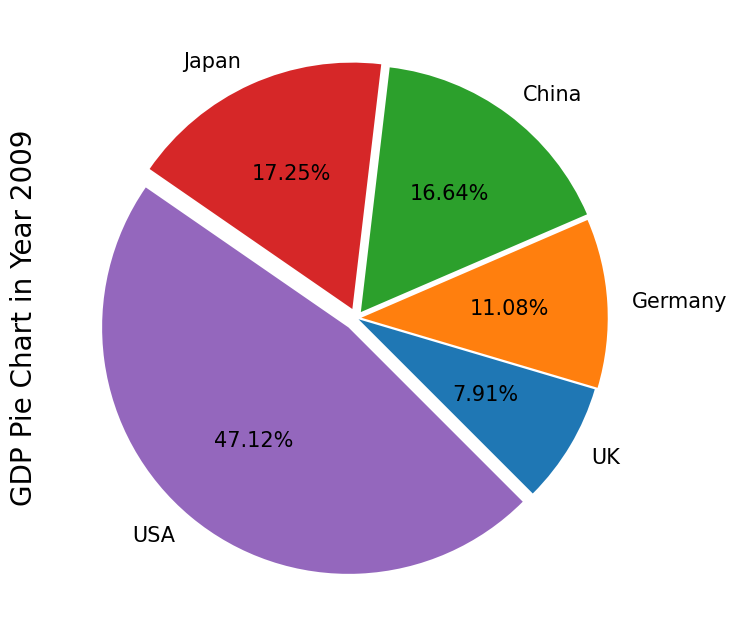

In [26]:
# Answer to question 2.10
fig = plt.figure(figsize=(12,8),dpi=100)
colors = plt.cm.Dark2(range(5))
labels = yr2009.index
GDPs = yr2009.values
plt.ylabel("GDP Pie Chart in Year 2009",fontsize=20)
explode = [0.01, 0.02, 0.03, 0.04, 0.05]
plt.pie(GDPs,
    labels=labels,
    autopct='%1.2f%%',
    startangle = -45,
    textprops={'fontsize': 15},
    explode=explode)
#plt.savefig(f"files/ch02/pie.png")
plt.show()